In [25]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('dataset.csv')
#showing our initial dataframe here
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,1,2,2,4,1,2020-04-22,2020-04-18,...,2,2,2,2,2,1,1,99,99,97
1,OUTSIDE USMER,STATE,15,2,15,15,33,2,2020-05-18,2020-05-15,...,2,2,2,1,2,2,1,99,99,2
2,OUTSIDE USMER,STATE,2,1,2,2,2,1,2020-05-22,2020-05-19,...,2,2,1,2,2,1,1,99,99,97
3,OUTSIDE USMER,STATE,15,2,9,15,87,1,2020-06-05,2020-06-04,...,2,2,2,2,1,1,1,99,99,97
4,OUTSIDE USMER,IMSS,25,2,25,25,6,1,2020-04-22,2020-04-18,...,2,2,2,2,2,99,1,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,2,25,25,9,1,2020-06-02,2020-05-23,...,2,2,2,2,2,99,1,99,99,97
159789,USMER,SSA,22,1,22,22,12,2,2020-06-04,2020-06-02,...,2,2,2,2,2,2,1,99,99,2
159790,OUTSIDE USMER,SSA,12,2,12,12,50,1,2020-06-04,2020-06-03,...,2,2,1,2,2,1,1,99,99,97
159791,OUTSIDE USMER,IMSS,15,2,15,15,39,1,2020-06-04,2020-06-02,...,2,2,2,2,2,99,1,99,99,97


In [26]:
## Question 1
unmodified = dataframe.copy()

df = pd.read_excel('data_dictionary.xlsx')
dictionary = df.set_index('variable').T.to_dict()

for key, value in dictionary.items():
    for i in value.values():
        res = dict(item.split("=") for item in i.split(", "))
        dictionary[key] = res

dictionary = {outer_k.upper(): {inner_k.replace(' ', ''): inner_v for inner_k, inner_v in outer_v.items()} for outer_k, outer_v in dictionary.items()}

for key, value in dictionary.items():
    dataframe[key]= dataframe[key].astype(str)
    dataframe.replace({key: dictionary[key]}, inplace=True)
    
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [4]:
#saving the q1 dataframe for displaying onto streamlit
pd.DataFrame.to_csv(dataframe, 'q1.csv')

### Question 2

<AxesSubplot:ylabel='Frequency'>

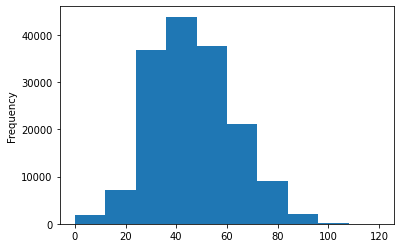

In [5]:
## Question 2
dataframe["AGE"].plot(kind="hist", bins=10)

### Question 3

In [6]:
## Question 3
bins = [0,10,20,30,40,50,60,70,80,90,100]

group = dataframe.groupby(['SEX',pd.cut(dataframe.AGE, bins)])
group.size().unstack()
#

AGE,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
SEX,,,,,,,,,,
Female,729,1888,11223,16390,16240,12388,7212,3628,1443,209
Male,783,1886,11823,19313,20026,17013,10241,5162,1691,216


### Question 4

In [7]:
## Question 4
filter = dataframe['INTUBATED'] == 'YES'
dataframe[filter].shape[0]

4828

### Question 5

In [27]:
## Question 5
diseases_and_ICU = list(['DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER_DISEASE', 'ICU'])

In [55]:
corr_disease = unmodified[diseases_and_ICU].corr()
corr_disease

,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_DISEASE,ICU
DIABETES,1.000000,0.847660,0.853429,0.820727,0.854574,0.708794,-0.008068
COPD,0.847660,1.000000,0.930534,0.890390,0.877483,0.765948,-0.019711
ASTHMA,0.853429,0.930534,1.000000,0.907258,0.884746,0.777309,-0.023228
INMUSUPR,0.820727,0.890390,0.907258,1.000000,0.861896,0.805040,-0.023368
HYPERTENSION,0.854574,0.877483,0.884746,0.861896,1.000000,0.756025,-0.008134
OTHER_DISEASE,0.708794,0.765948,0.777309,0.805040,0.756025,1.000000,-0.033712
ICU,-0.008068,-0.019711,-0.023228,-0.023368,-0.008134,-0.033712,1.000000


<AxesSubplot:>

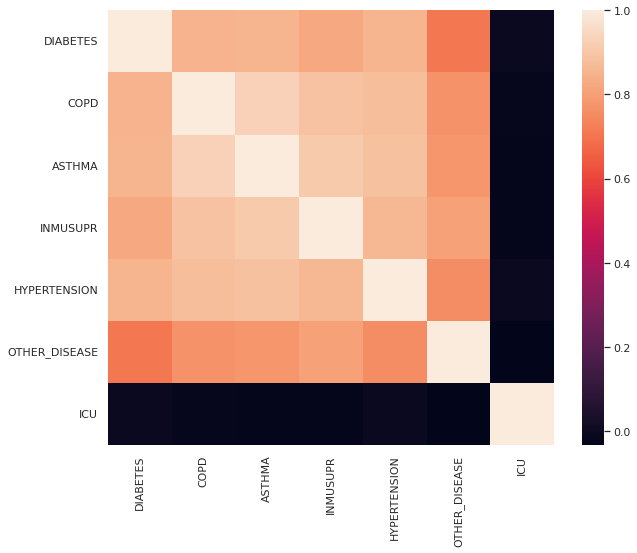

In [38]:
import seaborn as sns;
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_disease)

### Question 6

In [39]:
## Question 6
filter = dataframe['DATE_OF_DEATH'].notnull()
dataframe.loc[filter, 'DIABETES':'OTHER_DISEASE'][dataframe == 'YES'].count().sort_values(ascending=False).idxmax()

'HYPERTENSION'

### Question 7

In [40]:
## Question 8
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [41]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [42]:
df1 = dataframe.copy()
df1

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [43]:
filter = (df1['ICU'].str.contains('UNKNOWN') | df1['ICU'].str.contains('DOES NOT APPLY'))
df1.drop(df1.index[filter], inplace=True)

In [44]:
df1['ICU'] = np.where(df1['ICU'] == 'YES', '1', df1['ICU'])
df1['ICU'] = np.where(df1['ICU'] == 'NO', '0', df1['ICU'])
df1['ICU'] = df1['ICU'].astype(str).astype(int)

In [45]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
BIRTHPLACE_LOCATION        int64
PATIENT_LOCATION           int64
MUNICIPALITY               int64
HOSPITALIZED              object
ADMISSION DATE            object
DATE_OF_FIRST_SYMPTOM     object
DATE_OF_DEATH             object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
COUNTRY OF

In [46]:
df1['ICU'].value_counts()

0    46510
1     4654
Name: ICU, dtype: int64

In [47]:
df1.shape

(51164, 32)

In [48]:
def split_date(df1):
    return df1.join(
        df1['ADMISSION DATE']
        # Split date
        .str.split('-', expand=True)
        .rename(columns={0: 'ADMISSION_YEAR', 1: 'ADMISSION_MONTH', 2: 'ADMISSION_DATE'})
    )

df1 = df1.pipe(split_date)

In [49]:
df1.drop(['ADMISSION DATE', 'BIRTHPLACE_LOCATION', 'DATE_OF_FIRST_SYMPTOM', 'DATE_OF_DEATH', 'MUNICIPALITY', 'COUNTRY OF ORIGIN'], axis=1, inplace=True)
df1.shape

(51164, 29)

In [50]:
df1['ADMISSION_YEAR'] = df1['ADMISSION_YEAR'].astype(str).astype(int)
df1['ADMISSION_MONTH'] = df1['ADMISSION_MONTH'].astype(str).astype(int)
df1['ADMISSION_DATE'] = df1['ADMISSION_DATE'].astype(str).astype(int)

In [51]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
PATIENT_LOCATION           int64
HOSPITALIZED              object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
ICU                        int64
ADMISSION_YEAR             int64
ADMISSION_MONTH            int64
ADMISSION_DATE             int64
dtype: object

In [52]:
col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,TREATMENT_LOCATION,PATIENT_LOCATION,AGE,ICU,ADMISSION_YEAR,ADMISSION_MONTH,ADMISSION_DATE,ORIGIN_OUTSIDE USMER,ORIGIN_USMER,SECTOR_ACADEMIC,...,TOBACCO_IGNORED,TOBACCO_NO,TOBACCO_YES,ANOTHER CASE_NO,ANOTHER CASE_UNKNOWN,ANOTHER CASE_YES,OUTCOME_POSITIVE,MIGRANT_NO,MIGRANT_UNKNOWN,MIGRANT_YES
1,15,15,35,0,2020,5,18,1,0,0,...,0,1,0,1,0,0,1,0,1,0
5,15,15,79,0,2020,4,18,1,0,0,...,0,1,0,0,1,0,1,0,1,0
6,15,15,55,0,2020,5,5,1,0,0,...,0,0,1,0,0,1,1,0,1,0
7,15,15,66,0,2020,5,8,1,0,0,...,0,1,0,0,1,0,1,0,1,0
14,15,15,43,0,2020,6,4,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [53]:
y = df1.ICU
X = df1.drop("ICU", 1)
colnames = X.columns
pd.DataFrame.to_csv(df1, 'cleaned.csv')

### Question 8

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1) 

rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

rf.fit(X_train, y_train)

accuracy_score(y_test, rf.predict(X_test))

boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	89
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	89
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	89
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=120,
                                          random_state=RandomState(MT19937) at 0x1D15C0E9C40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1D15C0E9C40, verbose=2)

In [101]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [ 1  1  1  1  1 77 89  1  1 84 40  7  1 89  4  1  1  6  9 12 89  1  1  1
  1 64 74 10 80 11 78 21 13 56 15 14 15 26 62 56 19 34 42 29 33 44 32 23
 23 20 27 23 30 37 42 25  4  3 17 48 58 30 45 66  1  1  1 89 80 83 85 89
 78  8  1 18  2 82 60 72 46 53 28 34 39 64 54 68 64 36 51 49 76 37 70 50
 70 86 52 66 59 74 56 61 40 68 47 72]
No. of significant features:  18


In [102]:
boruta_score = ranking(list(map(float, boruta_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [103]:
print('---------Top 20----------')
display(boruta_score.head(20))

---------Top 20----------


,Features,Score
0,TREATMENT_LOCATION,1.00
21,INTUBATED_NO,1.00
23,PNEUMONIA_NO,1.00
16,SECTOR_SSA,1.00
15,SECTOR_SEMAR,1.00
24,PNEUMONIA_YES,1.00
12,SECTOR_PRIVATE,1.00
74,ADMISSION_MONTH_04,1.00
66,ANOTHER CASE_YES,1.00
65,ANOTHER CASE_UNKNOWN,1.00


Text(0.5, 1.0, 'Boruta Top 20 Features')

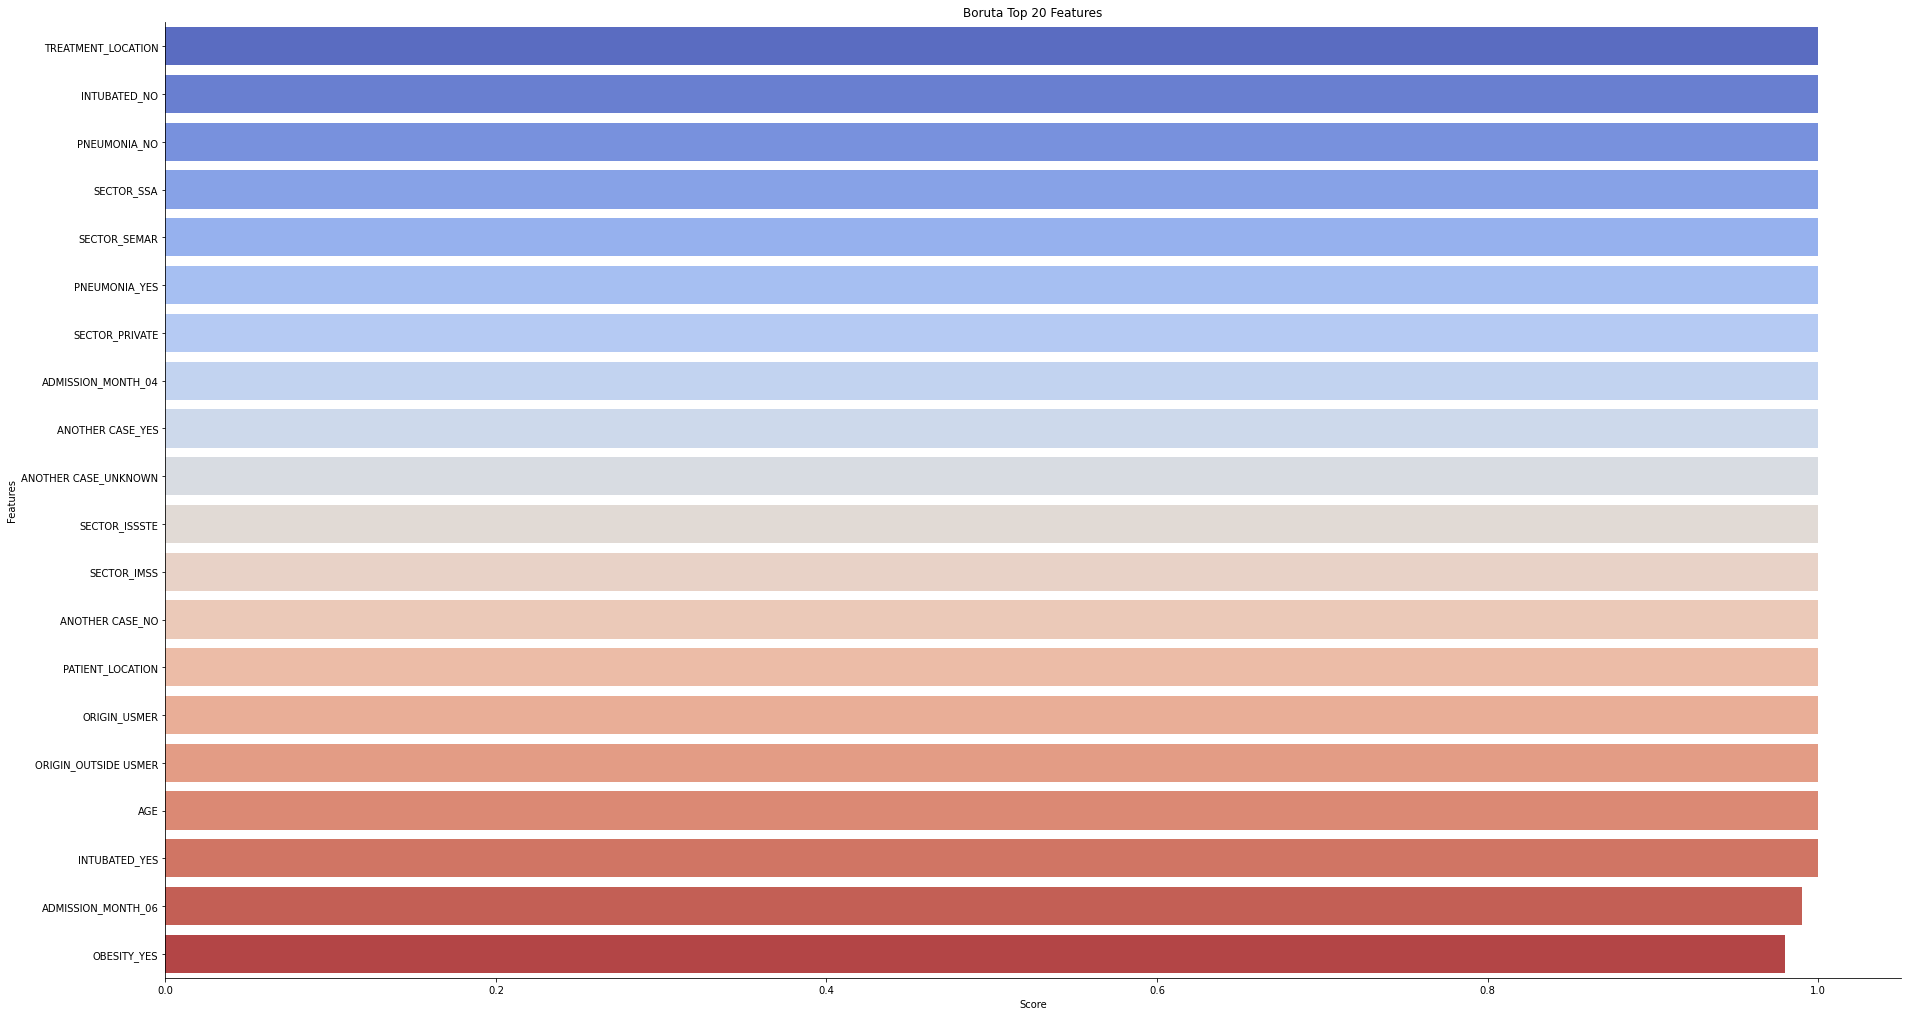

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

In [124]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [ ]:
rfe.fit(X, y)

In [ ]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [ ]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")

### Question 9

In [40]:
## Question 9

## Top N features of BORUTA
top_20_features = boruta_score.Features[:20].tolist()
top_20_features

['TREATMENT_LOCATION',
 'SECTOR_PRIVATE',
 'PATIENT_LOCATION',
 'INTUBATED_NO',
 'INTUBATED_YES',
 'ANOTHER CASE_NO',
 'PNEUMONIA_NO',
 'ANOTHER CASE_UNKNOWN',
 'SECTOR_SSA',
 'ANOTHER CASE_YES',
 'SECTOR_SEMAR',
 'SECTOR_IMSS',
 'SECTOR_ISSSTE',
 'AGE',
 'ORIGIN_USMER',
 'PNEUMONIA_YES',
 'OBESITY_NO',
 'OBESITY_YES',
 'SECTOR_SEDENA',
 'ADMISSION DATE_2020-04-06']

In [41]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9228965112870126
Top  6 features :  0.9227987882341444
Top  7 features :  0.9213329424411218
Top  8 features :  0.9199648197009674
Top  9 features :  0.9229942343398808
Top  10 features :  0.9222124499169354
Top  11 features :  0.9235805726570898
Top  12 features :  0.9226033421284081
Top  13 features :  0.9255350337144532
Top  14 features :  0.9246555262386397
Top  15 features :  0.9240691879214307
Top  16 features :  0.9239714648685625
Top  17 features :  0.9244600801329034
Top  18 features :  0.9239714648685625
Top  19 features :  0.9248509723443761
Top  20 features :  0.9244600801329034


Text(0.5, 1.0, 'Score for Top N Features of Boruta')

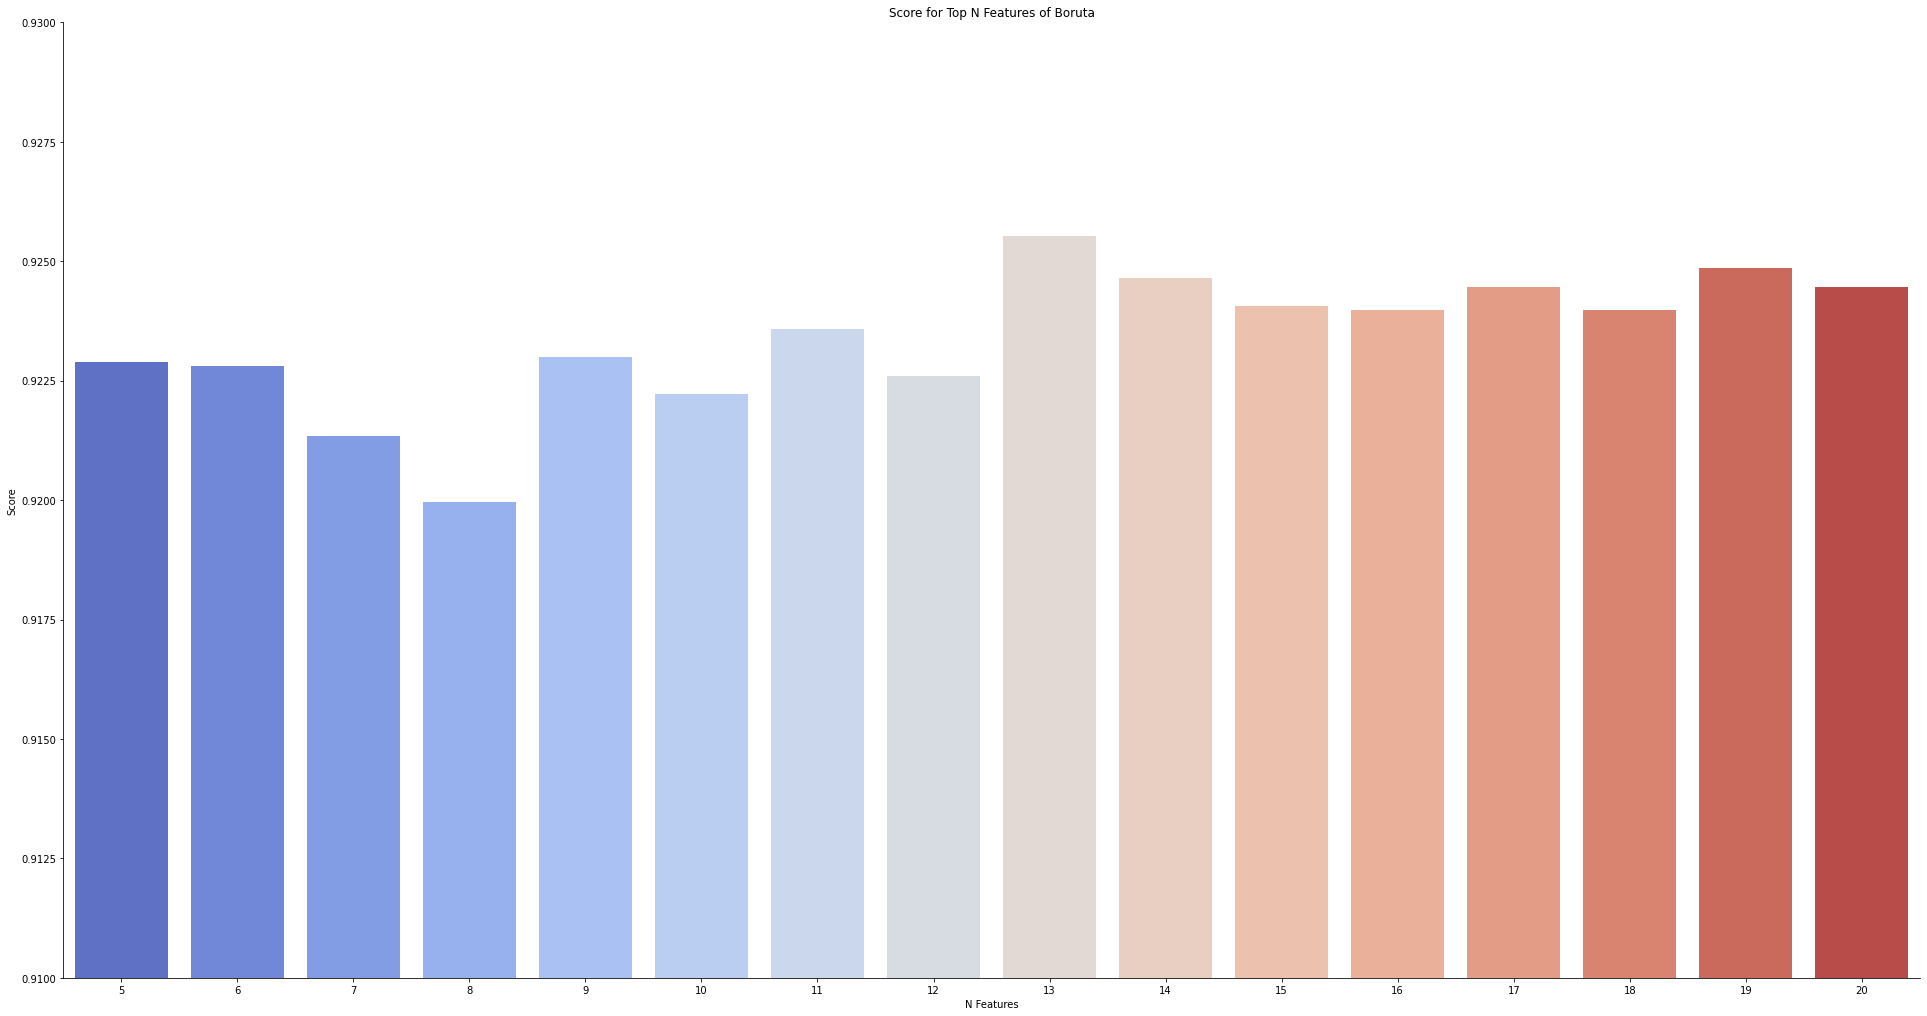

In [42]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of Boruta")

In [43]:
## Top N features of RFE
rfe_score
top_20_features = rfe_score.Features[:20].tolist()
top_20_features

['INTUBATED_NO',
 'SECTOR_IMSS',
 'INTUBATED_YES',
 'TREATMENT_LOCATION',
 'PATIENT_LOCATION',
 'ANOTHER CASE_UNKNOWN',
 'PNEUMONIA_NO',
 'SECTOR_SSA',
 'PNEUMONIA_YES',
 'SECTOR_PRIVATE',
 'ANOTHER CASE_NO',
 'AGE',
 'SECTOR_ISSSTE',
 'ORIGIN_OUTSIDE USMER',
 'ORIGIN_USMER',
 'SECTOR_STATE',
 'ANOTHER CASE_YES',
 'SECTOR_SEDENA',
 'OBESITY_NO',
 'OBESITY_YES']

In [44]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9221147268640673
Top  6 features :  0.9227010651812763
Top  7 features :  0.9218215577054627
Top  8 features :  0.9212352193882537
Top  9 features :  0.9222124499169354
Top  10 features :  0.92250561907554
Top  11 features :  0.9216261115997264
Top  12 features :  0.9218215577054627
Top  13 features :  0.9251441415029805
Top  14 features :  0.924264634027167
Top  15 features :  0.9243623570800352
Top  16 features :  0.9270008795074758
Top  17 features :  0.9249486953972442
Top  18 features :  0.9249486953972442
Top  19 features :  0.9254373106615851
Top  20 features :  0.9246555262386397


Text(0.5, 1.0, 'Score for Top N Features of RFE')

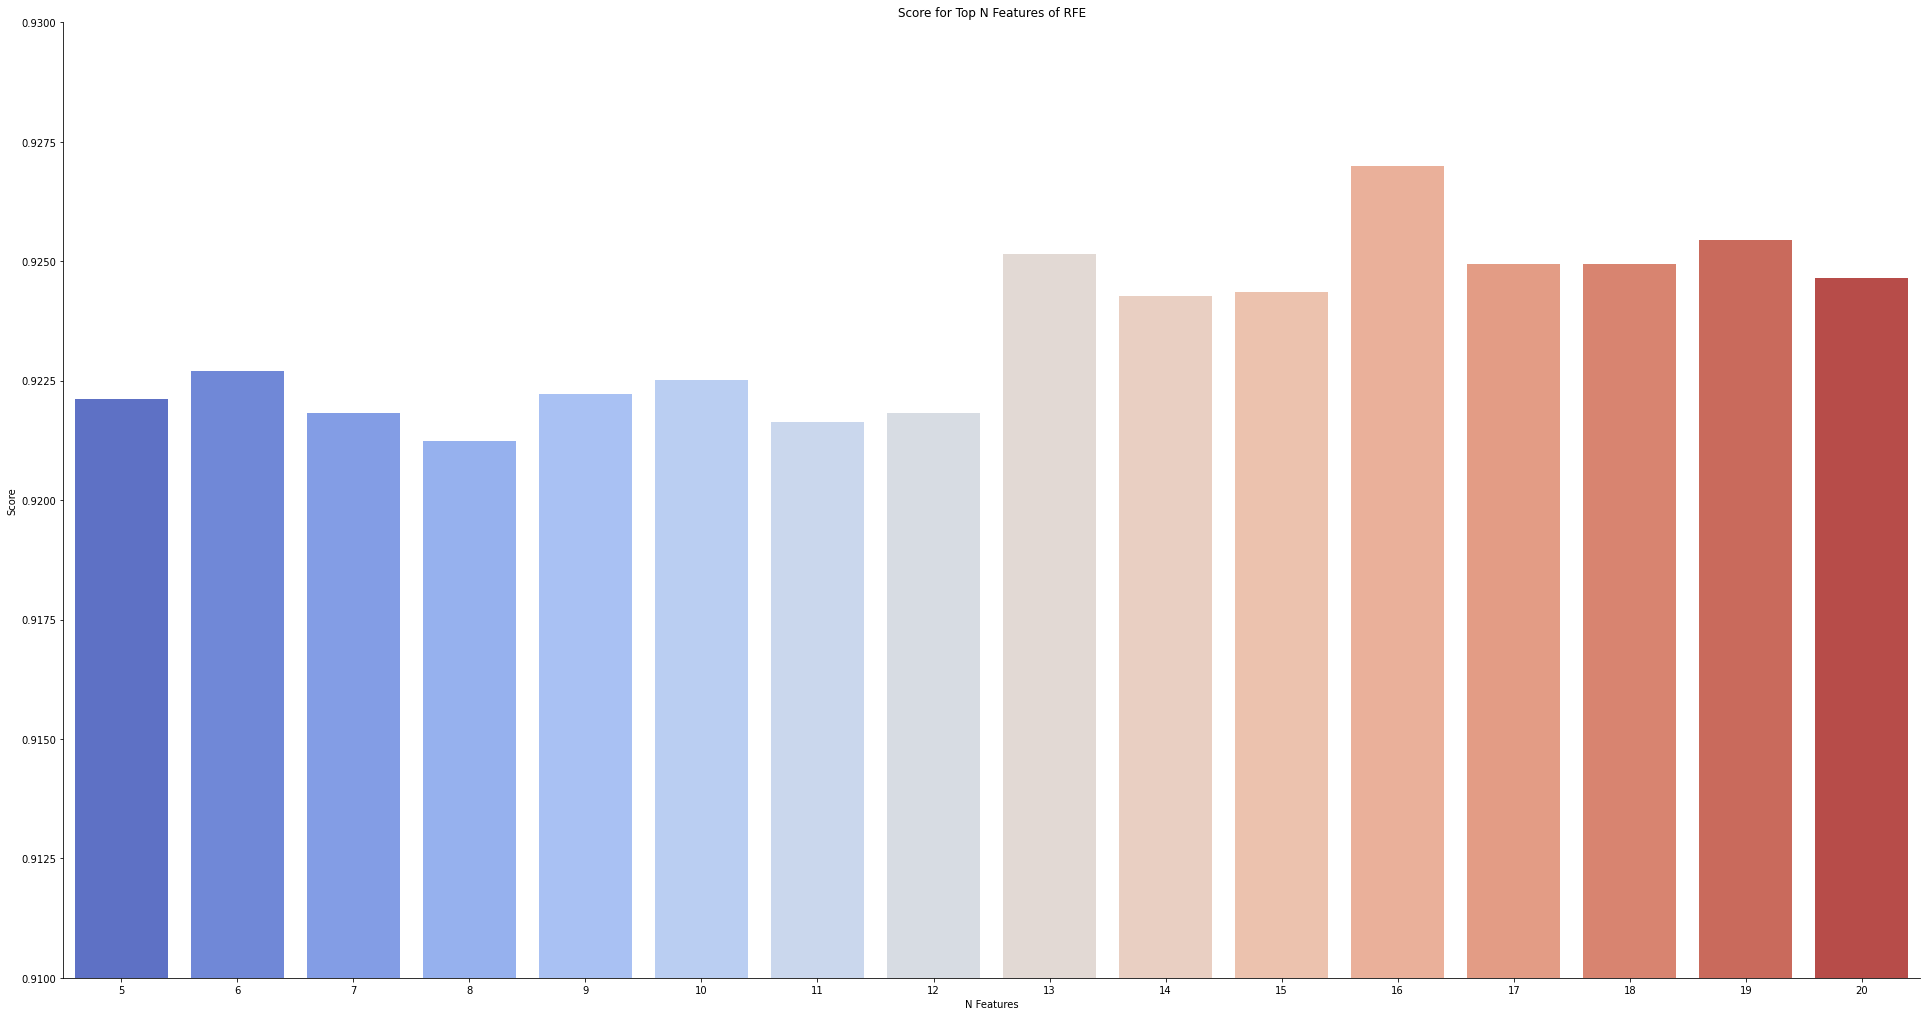

In [45]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of RFE")

### Question 10

In [105]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [107]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [108]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.819
Accuracy on test set: 0.822


In [109]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[11714  2289]
 [  437   910]]
**********************
Mjority TN=  11714
Mjority FP= 2289
Mjority FN=  437
Mjority TP=  910
**********************
Precision= 0.28
Recall= 0.68
F1= 0.40
Accuracy= 0.82


In [110]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.82


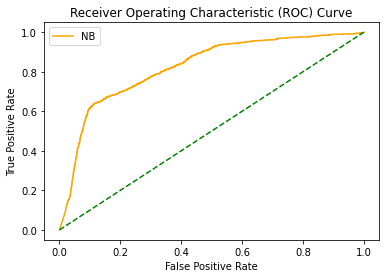

In [111]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 11

In [71]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [113]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.913


In [114]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[14003     0]
 [ 1340     7]]
**********************
Mjority TN=  14003
Mjority FP= 0
Mjority FN=  1340
Mjority TP=  7
**********************
Precision= 1.00
Recall= 0.01
F1= 0.01
Accuracy= 0.91


In [115]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.88


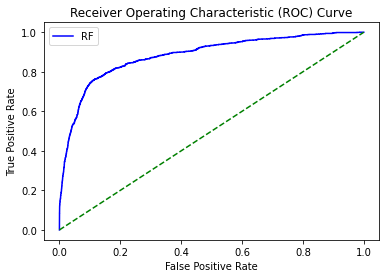

In [116]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(fpr_RF, tpr_RF, color='blue', label='RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 12

In [117]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [118]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.914


In [119]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[13727   276]
 [ 1045   302]]
**********************
Mjority TN=  13727
Mjority FP= 276
Mjority FN=  1045
Mjority TP=  302
**********************
Precision= 0.52
Recall= 0.22
F1= 0.31
Accuracy= 0.91


In [120]:
#AUC
prob_KNN = KNN.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

AUC: 0.73


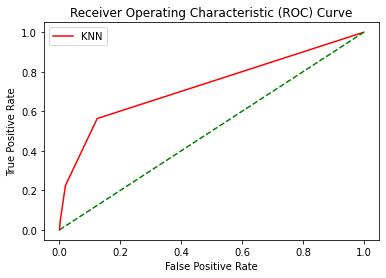

In [121]:
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 13

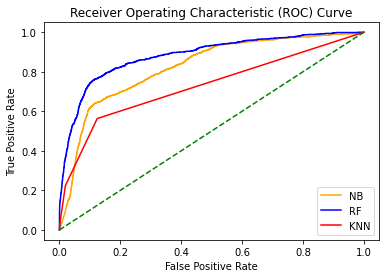

In [122]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

## Question 14

In [ ]:
## Question 14
